<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.463423,38.038963,28.631001,44.127840,891.024518,1059.285746,218.493825,840.791921
1,0.0,1.0,35.171114,80.061004,28.748141,99.074932,579.647058,832.702249,528.268427,304.433823
2,0.0,2.0,30.478600,46.545219,69.803601,50.760089,-618.482975,-410.895466,346.038000,-756.933465
3,0.0,3.0,43.546982,34.196884,98.340867,75.138898,51.490824,312.714455,450.912234,-138.197779
4,0.0,4.0,66.109777,22.679925,69.532080,62.018132,89.451369,319.791284,289.813052,29.978232
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.722698,56.922919,97.647005,22.975010,1113.583569,1382.851201,489.269886,893.581315
119996,999.0,116.0,54.197620,82.151544,72.962836,74.489681,-164.705870,129.095811,617.867077,-488.771266
119997,999.0,117.0,86.789047,47.928580,40.298861,97.764064,-817.305447,-534.524895,388.986806,-923.511701
119998,999.0,118.0,21.413666,84.150303,56.254156,73.129713,-4528.163705,-4283.215867,381.000548,-4664.216415


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,47.463423,38.038963,28.631001,44.127840,891.024518,1059.285746,218.493825,840.791921
1,0.0,1.0,35.171114,80.061004,28.748141,99.074932,579.647058,832.702249,528.268427,304.433823
2,0.0,2.0,30.478600,46.545219,69.803601,50.760089,-618.482975,-410.895466,346.038000,-756.933465
3,0.0,3.0,43.546982,34.196884,98.340867,75.138898,51.490824,312.714455,450.912234,-138.197779
4,0.0,4.0,66.109777,22.679925,69.532080,62.018132,89.451369,319.791284,289.813052,29.978232
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.722698,56.922919,97.647005,22.975010,1113.583569,1382.851201,489.269886,893.581315
119996,999.0,116.0,54.197620,82.151544,72.962836,74.489681,-164.705870,129.095811,617.867077,-488.771266
119997,999.0,117.0,86.789047,47.928580,40.298861,97.764064,-817.305447,-534.524895,388.986806,-923.511701
119998,999.0,118.0,21.413666,84.150303,56.254156,73.129713,-4528.163705,-4283.215867,381.000548,-4664.216415


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    47.463423  38.038963  28.631001  44.127840   891.024518   
      1.0    35.171114  80.061004  28.748141  99.074932   579.647058   
      2.0    30.478600  46.545219  69.803601  50.760089  -618.482975   
      3.0    43.546982  34.196884  98.340867  75.138898    51.490824   
      4.0    66.109777  22.679925  69.532080  62.018132    89.451369   
...                ...        ...        ...        ...          ...   
999.0 115.0  81.722698  56.922919  97.647005  22.975010  1113.583569   
      116.0  54.197620  82.151544  72.962836  74.489681  -164.705870   
      117.0  86.789047  47.928580  40.298861  97.764064  -817.305447   
      118.0  21.413666  84.150303  56.254156  73.129713 -4528.163705   
      119.0  49.435869  59.793924  93.134599  90.456769  1951.433643   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1059.285746  218.493825   840.791921  
      1.0     832.702249  528.268427   304.433823  
      2.0    -410.895466  346.038000  -756.933465  
      3.0     312.714455  450.912234  -138.197779  
      4.0     319.791284  289.813052    29.978232  
...                  ...         ...          ...  
999.0 115.0  1382.851201  489.269886   893.581315  
      116.0   129.095811  617.867077  -488.771266  
      117.0  -534.524895  388.986806  -923.511701  
      118.0 -4283.215867  381.000548 -4664.216415  
      119.0  2254.254805  719.701890  1534.552915  

[120000 rows x 8 columns]

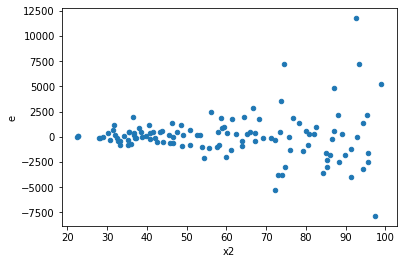

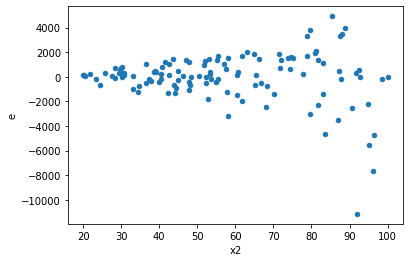

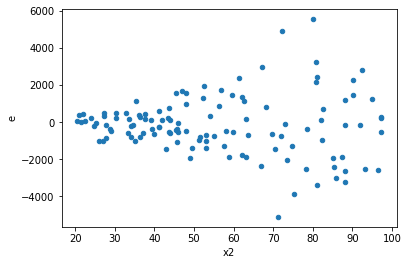

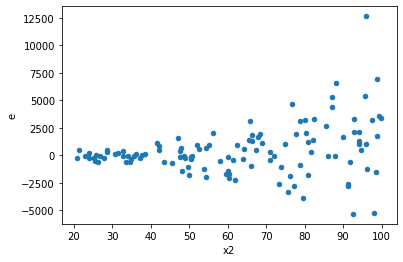

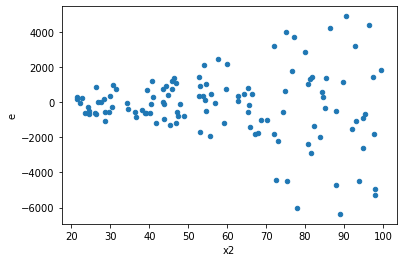

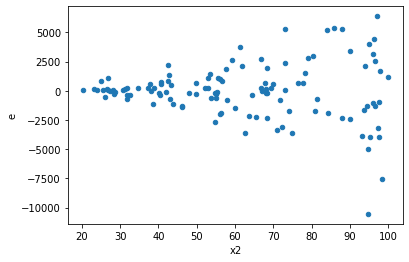

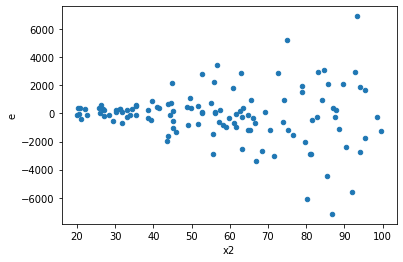

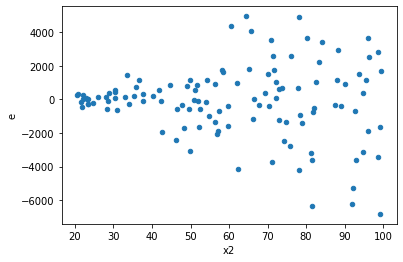

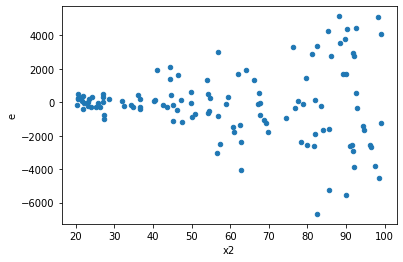

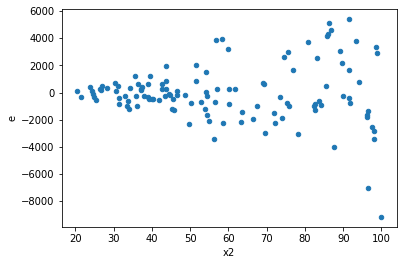

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,57.0,55.0,161696343.8914267,387572003.3788115,2836777.963007486,7046763.697796572,2.4840730538973017,0.0008904198628811866,0.9995547900685594,0.0004452099314405933,Reject001=0 : Heteroscedasticity
1.0,55.0,57.0,141970815.58635265,323172988.2455501,2581287.5561155025,5669701.548167545,2.1964625888871128,0.0037041652958322846,0.9981479173520839,0.0018520826479161423,Reject001=0 : Heteroscedasticity
2.0,63.0,49.0,129479237.04907872,140880390.93400437,2055225.9849060115,2875110.0190613135,1.3989264636476444,0.22321050782829133,0.8883947460858543,0.11160525391414566,Reject001=1 : Homoscedasticity
3.0,49.0,63.0,96010994.80624603,472348079.7411114,1959408.0572703271,7497588.567319228,3.826455923512023,8.258088757262527e-07,0.9999995870955621,4.1290443786312636e-07,Reject001=0 : Heteroscedasticity
4.0,56.0,56.0,35387634.745954506,403454175.7319632,631922.0490349019,7204538.852356486,11.40099299171403,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,57.0,55.0,138336494.43761635,309289600.4875185,2426956.042765199,5623447.281591245,2.317078341140477,0.0020939603599481327,0.9989530198200259,0.0010469801799740663,Reject001=0 : Heteroscedasticity
9.0,57.0,55.0,245453889.4739725,247835402.4461514,4306208.587262675,4506098.226293662,1.0464189402302153,0.8670830738686188,0.5664584630656906,0.4335415369343094,Reject001=1 : Homoscedasticity
13.0,51.0,61.0,218157893.49582398,321670037.58334965,4277605.754820078,5273279.304645076,1.2327642159876602,0.4318181566371868,0.7840909216814066,0.2159090783185934,Reject001=1 : Homoscedasticity
20.0,50.0,62.0,118122057.45646335,371834073.0087827,2362441.149129267,5997323.758206172,2.538612976842461,0.0005487175636058605,0.9997256412181971,0.0002743587818029303,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,57.0,55.0,161696343.8914267,387572003.3788115,2836777.963007486,7046763.697796572,2.4840730538973017,0.0008904198628811866,Reject001=0 : Heteroscedasticity
1.0,55.0,57.0,141970815.58635265,323172988.2455501,2581287.5561155025,5669701.548167545,2.1964625888871128,0.0037041652958322846,Reject001=0 : Heteroscedasticity
2.0,63.0,49.0,129479237.04907872,140880390.93400437,2055225.9849060115,2875110.0190613135,1.3989264636476444,0.22321050782829133,Reject001=1 : Homoscedasticity
3.0,49.0,63.0,96010994.80624603,472348079.7411114,1959408.0572703271,7497588.567319228,3.826455923512023,8.258088757262527e-07,Reject001=0 : Heteroscedasticity
4.0,56.0,56.0,35387634.745954506,403454175.7319632,631922.0490349019,7204538.852356486,11.40099299171403,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,59.0,53.0,543227297.2694238,106475334.47476676,9207242.326600404,2008968.5749955992,0.2181943847824598,3.963490759574908e-08,Reject001=0 : Heteroscedasticity
6.0,48.0,64.0,262211984.17930895,134234138.29773194,5462749.67040227,2097408.4109020615,0.38394737768527676,0.000724592603829048,Reject001=0 : Heteroscedasticity
7.0,57.0,55.0,138336494.43761635,309289600.4875185,2426956.042765199,5623447.281591245,2.317078341140477,0.0020939603599481327,Reject001=0 : Heteroscedasticity
8.0,61.0,51.0,484585924.88358563,30900833.224943012,7944031.555468617,605898.6906851571,0.07627093201411826,9.49981893583099e-19,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      524
Reject001=0 : Heteroscedasticity    476
Name: Result_test, dtype: int64